# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

In [2]:
kc_house_data = pd.read_csv(r"C:\Users\kd67152\Desktop\Datasets\kc_house_data.csv")
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
kc_house_data.shape

(21613, 21)

# To change the data column into year

In [4]:
kc_house_data["date"] = kc_house_data["date"].apply(lambda x:x[:4]).astype("int64")

In [5]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Feature Engineering

In [6]:
kc_house_data["build_age"] = kc_house_data["date"] - kc_house_data["yr_built"]

In [7]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,build_age
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [8]:
kc_house_data.shape

(21613, 22)

# Selected columns

In [9]:
kc_house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'build_age'],
      dtype='object')

In [10]:
columns = ["sqft_living","bedrooms","floors","waterfront","sqft_above","bathrooms","grade"]

# Create a dataFrame with selected columns

In [11]:
dataFrame = pd.DataFrame(kc_house_data[columns])
dataFrame["price"] = kc_house_data["price"]
dataFrame.head()

,sqft_living,bedrooms,floors,waterfront,sqft_above,bathrooms,grade,price
0,1180,3,1.0,0,1180,1.00,7,221900.0
1,2570,3,2.0,0,2170,2.25,7,538000.0
2,770,2,1.0,0,770,1.00,6,180000.0
3,1960,4,1.0,0,1050,3.00,7,604000.0
4,1680,3,1.0,0,1680,2.00,8,510000.0


# Descriptive Statistics

In [12]:
dataFrame.describe()

,sqft_living,bedrooms,floors,waterfront,sqft_above,bathrooms,grade,price
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,2079.899736,3.370842,1.494309,0.007542,1788.390691,2.114757,7.656873,5.400881e+05
std,918.440897,0.930062,0.539989,0.086517,828.090978,0.770163,1.175459,3.671272e+05
min,290.000000,0.000000,1.000000,0.000000,290.000000,0.000000,1.000000,7.500000e+04
25%,1427.000000,3.000000,1.000000,0.000000,1190.000000,1.750000,7.000000,3.219500e+05
50%,1910.000000,3.000000,1.500000,0.000000,1560.000000,2.250000,7.000000,4.500000e+05
75%,2550.000000,4.000000,2.000000,0.000000,2210.000000,2.500000,8.000000,6.450000e+05
max,13540.000000,33.000000,3.500000,1.000000,9410.000000,8.000000,13.000000,7.700000e+06


# Display the Complete Meta-Data of the dataset

In [13]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21613 non-null  int64  
 1   bedrooms     21613 non-null  int64  
 2   floors       21613 non-null  float64
 3   waterfront   21613 non-null  int64  
 4   sqft_above   21613 non-null  int64  
 5   bathrooms    21613 non-null  float64
 6   grade        21613 non-null  int64  
 7   price        21613 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


# Handling Duplicates¶

In [14]:
dataFrame.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [15]:
droped_dataFrame = dataFrame.drop_duplicates()
droped_dataFrame.head()

,sqft_living,bedrooms,floors,waterfront,sqft_above,bathrooms,grade,price
0,1180,3,1.0,0,1180,1.00,7,221900.0
1,2570,3,2.0,0,2170,2.25,7,538000.0
2,770,2,1.0,0,770,1.00,6,180000.0
3,1960,4,1.0,0,1050,3.00,7,604000.0
4,1680,3,1.0,0,1680,2.00,8,510000.0


In [16]:
droped_dataFrame.shape

(21475, 8)

# Handling Outliers

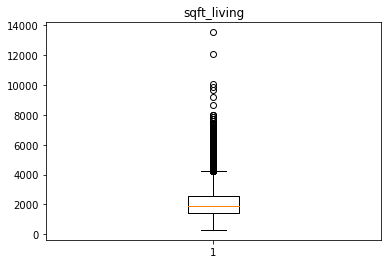

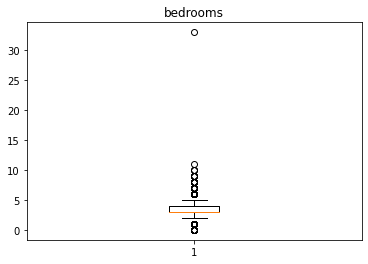

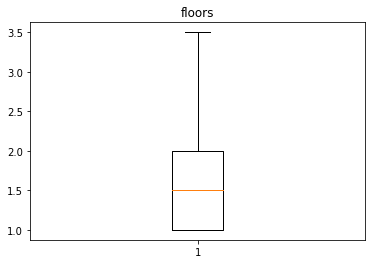

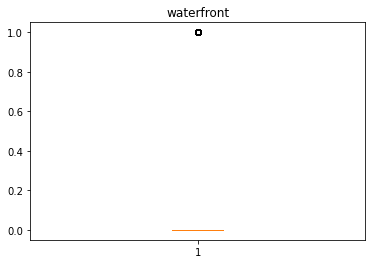

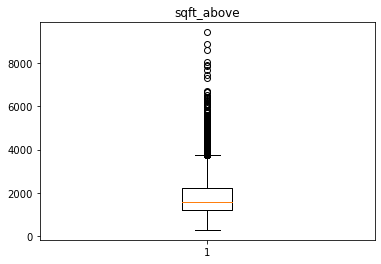

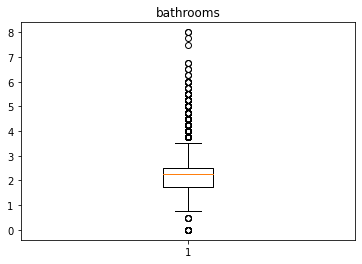

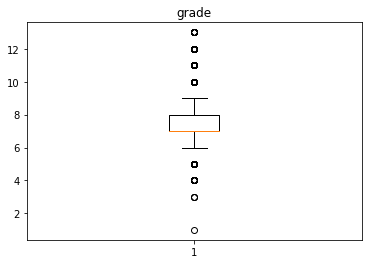

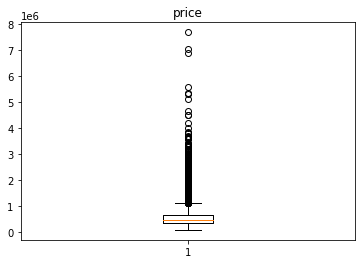

In [17]:
for col in droped_dataFrame.columns:
    plt.boxplot(droped_dataFrame[col])
    plt.title(col)
    plt.show()

# Handling Missing Values

In [18]:
droped_dataFrame.isnull().sum()

sqft_living    0
bedrooms       0
floors         0
waterfront     0
sqft_above     0
bathrooms      0
grade          0
price          0
dtype: int64

# Univariate Analysis

# Histogram Plot

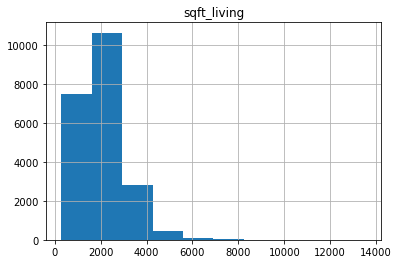

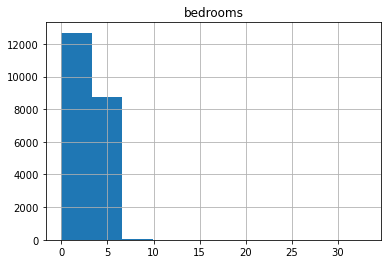

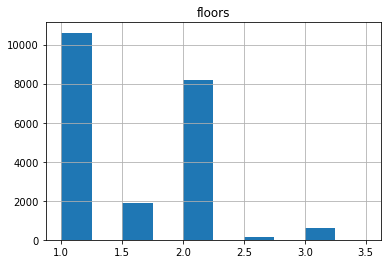

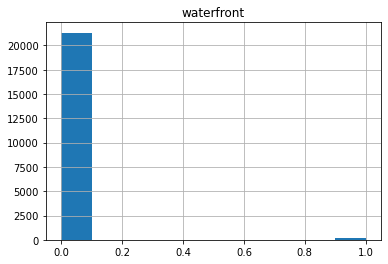

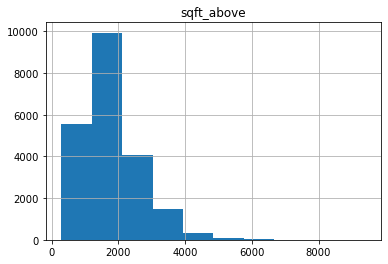

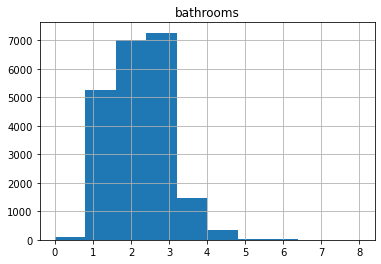

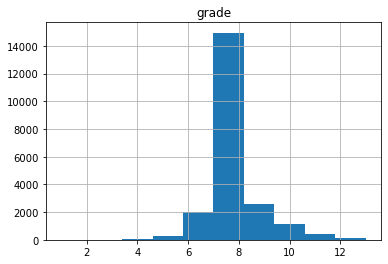

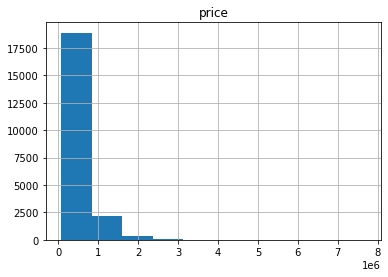

In [19]:
for col in droped_dataFrame.columns:
    droped_dataFrame[col].hist()
    plt.title(col)
    plt.show()

# Bivariate Analysis

# Scatter Plot

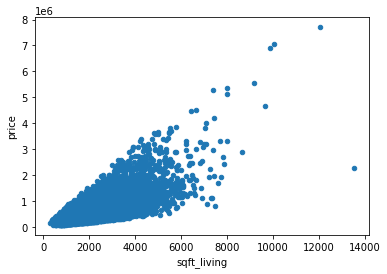

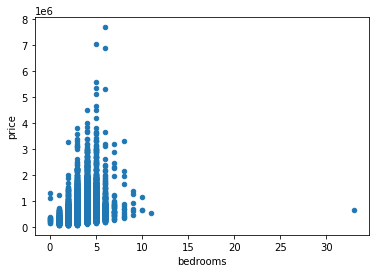

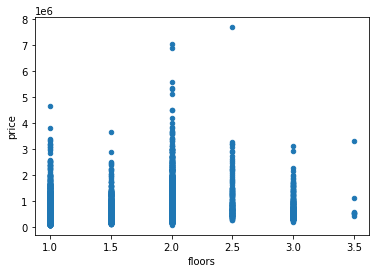

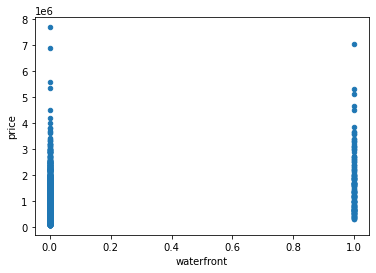

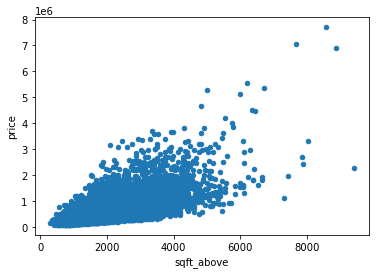

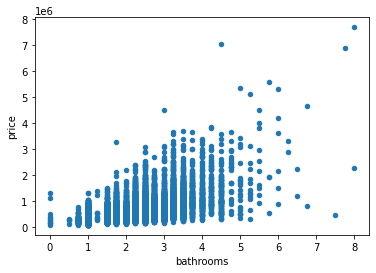

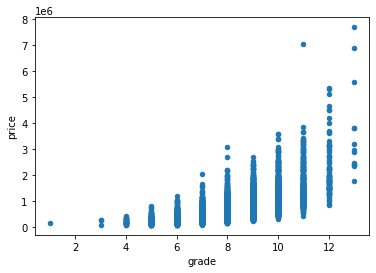

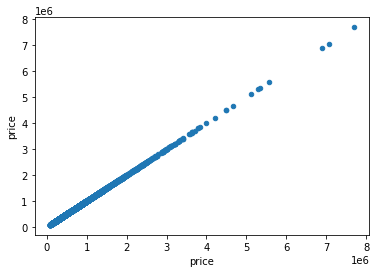

In [20]:
for col in droped_dataFrame.columns:
    dataFrame.plot(x=col,y="price",kind = 'scatter')
    plt.show()

# Correlation Matrix

In [21]:
droped_dataFrame.corr()

,sqft_living,bedrooms,floors,waterfront,sqft_above,bathrooms,grade,price
sqft_living,1.000000,0.575433,0.354036,0.103767,0.876285,0.754266,0.762809,0.701854
bedrooms,0.575433,1.000000,0.174752,-0.006805,0.475983,0.514755,0.356119,0.307751
floors,0.354036,0.174752,1.000000,0.023879,0.524550,0.499502,0.457445,0.256870
waterfront,0.103767,-0.006805,0.023879,1.000000,0.072058,0.063767,0.082807,0.266437
sqft_above,0.876285,0.475983,0.524550,0.072058,1.000000,0.684652,0.756004,0.605497
bathrooms,0.754266,0.514755,0.499502,0.063767,0.684652,1.000000,0.664787,0.525086
grade,0.762809,0.356119,0.457445,0.082807,0.756004,0.664787,1.000000,0.667376
price,0.701854,0.307751,0.256870,0.266437,0.605497,0.525086,0.667376,1.000000


# Heat map

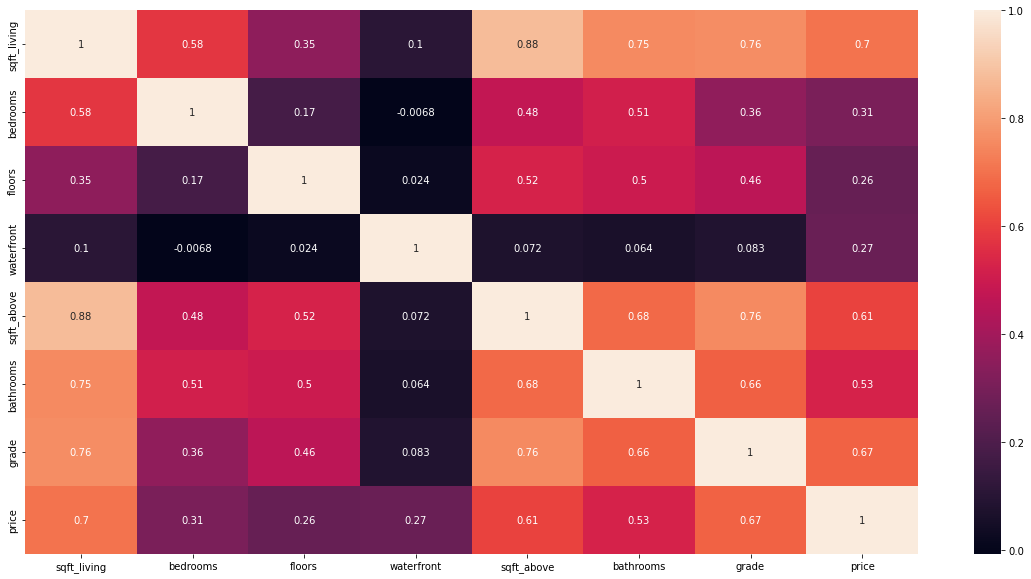

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(droped_dataFrame.corr(),annot=True)
plt.show()

In [23]:
for col in droped_dataFrame.columns:
    values = droped_dataFrame[col].unique()
    p0 = droped_dataFrame[col].min()
    p100 = droped_dataFrame[col].max()
    q1 = droped_dataFrame[col].quantile(0.25)
    q2 = droped_dataFrame[col].quantile(0.5)
    q3 = droped_dataFrame[col].quantile(0.75)
    iqr=q3-q1
    
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    
    droped_dataFrame[col].clip(upper=uc,lower=lc,inplace=True)

C:\Users\kd67152\AppData\Local\Temp\ipykernel_11920\4267058115.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_dataFrame[col].clip(upper=uc,lower=lc,inplace=True)


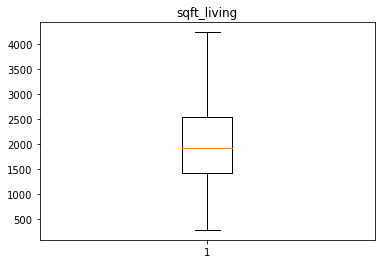

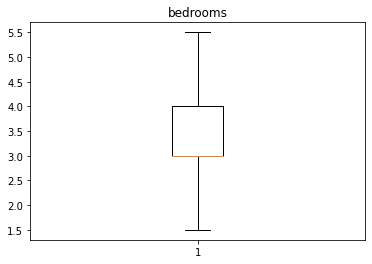

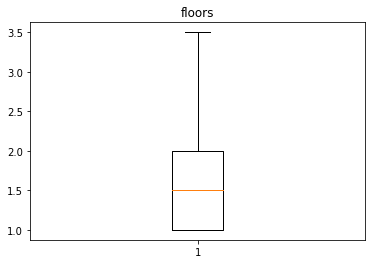

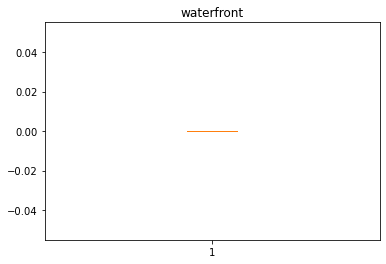

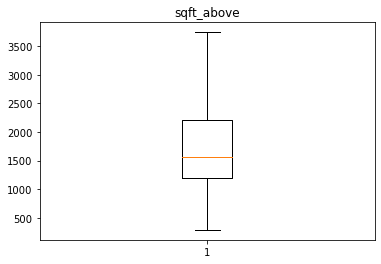

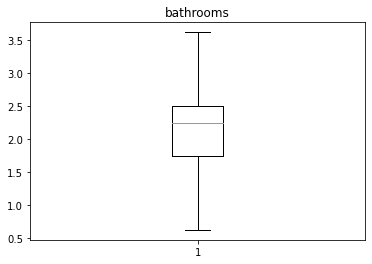

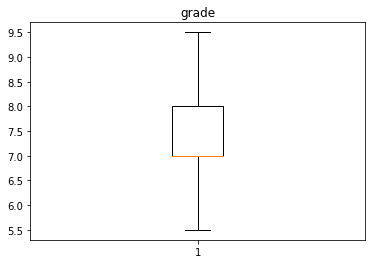

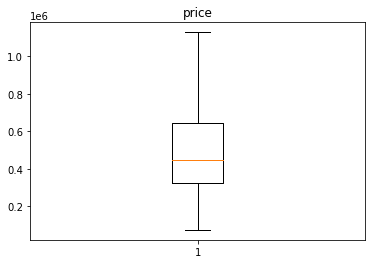

In [24]:
for col in droped_dataFrame.columns:
    plt.boxplot(droped_dataFrame[col])
    plt.title(col)
    plt.show()

In [25]:
X = droped_dataFrame.drop(["price"],axis=1)
y = droped_dataFrame["price"]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
X_train, X_test,y_train,y_test = train_test_split(X,y ,random_state=0)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
model.score(X_test,y_test)

0.576750619906205

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
model1 = DecisionTreeRegressor()

In [33]:
model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
model1.score(X_test,y_test)

0.3303367890358727

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
model2 = KNeighborsRegressor(n_neighbors=5)

In [37]:
model2.fit(X_train,y_train)

KNeighborsRegressor()

In [38]:
model2.score(X_test,y_test)

0.49940794310448966

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
model3 = RandomForestRegressor(n_estimators=100)

In [41]:
model3.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
model3.score(X_test,y_test)

0.5830036400454799